In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 89% 146M/163M [00:00<00:00, 1.53GB/s]
100% 163M/163M [00:00<00:00, 1.48GB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('face-mask-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import os
mask_data=os.listdir('/content/data/with_mask')
no_mask_data=os.listdir('/content/data/without_mask')
print(f"FIRST 5 FILES ARE : {mask_data[:5]}")
print(f"FIRST 5 FILES ARE : {no_mask_data[:5]}")

FIRST 5 FILES ARE : ['with_mask_2912.jpg', 'with_mask_1133.jpg', 'with_mask_1311.jpg', 'with_mask_192.jpg', 'with_mask_3274.jpg']
FIRST 5 FILES ARE : ['without_mask_756.jpg', 'without_mask_1872.jpg', 'without_mask_949.jpg', 'without_mask_3186.jpg', 'without_mask_3801.jpg']


In [5]:
print(len(mask_data),len(no_mask_data))

3725 3828


In [6]:
lable_mask=[0]*len(mask_data)
lable_no_mask=[1]*len(no_mask_data)
lable_train=lable_mask+lable_no_mask

In [7]:
len(lable_no_mask)

3828

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
mask_dir='/content/data/with_mask/'
train_data=[]
for i in os.listdir('/content/data/with_mask'):
  img=cv.imread(mask_dir+i)
  img_reized=cv.resize(img,(128,128))
  img_reized=cv.cvtColor(img_reized,cv.COLOR_BGR2RGB)
  img_array=np.array(img_reized)
  train_data.append(img_array)


no_mask_dir='/content/data/without_mask/'

for i in os.listdir('/content/data/without_mask'):
  img=cv.imread(no_mask_dir+i)
  img_reized=cv.resize(img,(128,128))
  img_reized=cv.cvtColor(img_reized,cv.COLOR_BGR2RGB)
  img_array=np.array(img_reized)
  train_data.append(img_array)

In [9]:
print(len(train_data))
print(len(lable_train))
#data is ready for training and testing of model


7553
7553


1


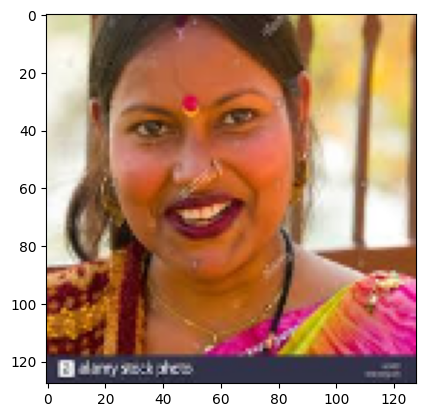

In [10]:
plt.imshow(train_data[-1])
print(lable_train[-1])

In [11]:
x=np.array(train_data)
y=np.array(lable_train)



In [12]:
type(y)

numpy.ndarray

In [13]:
from sklearn.model_selection import train_test_split as tts

In [14]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=2)

In [15]:
import tensorflow as tf

In [16]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [17]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(100,activation='relu',kernel_size=(3,3), input_shape=(128,128, 3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(80,activation='relu',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(40,activation='relu',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(20,activation='relu',kernel_size=(3,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(40,activation='relu'),
    tf.keras.layers.Dense(80,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2,activation='sigmoid'),


])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:

history=model.fit(x_train_scaled,y_train,epochs=10,validation_split=0.2,verbose=1)

Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.5924 - loss: 0.6307 - val_accuracy: 0.8710 - val_loss: 0.3205
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.8903 - loss: 0.2746 - val_accuracy: 0.9297 - val_loss: 0.2202
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.9118 - loss: 0.2402 - val_accuracy: 0.9330 - val_loss: 0.1991
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9363 - loss: 0.1871 - val_accuracy: 0.9297 - val_loss: 0.1934
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9408 - loss: 0.1615 - val_accuracy: 0.9338 - val_loss: 0.2082
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9149 - loss: 0.2200 - val_accuracy: 0.9173 - val_loss: 0.2325
Epoch 7/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.9273 - loss: 0.2047 - val_accuracy: 0.9305 - val_loss: 0.1996
Epoch 8/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - accuracy: 0.9536 - loss: 0.1372 - val_acc

In [20]:
model.evaluate(x_test_scaled,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9568 - loss: 0.0999


[0.1031007468700409, 0.9589675664901733]

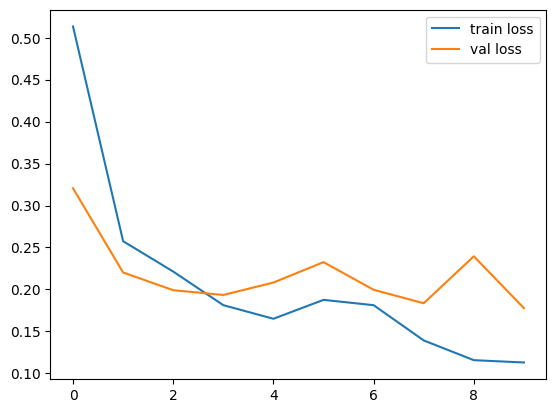

In [21]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

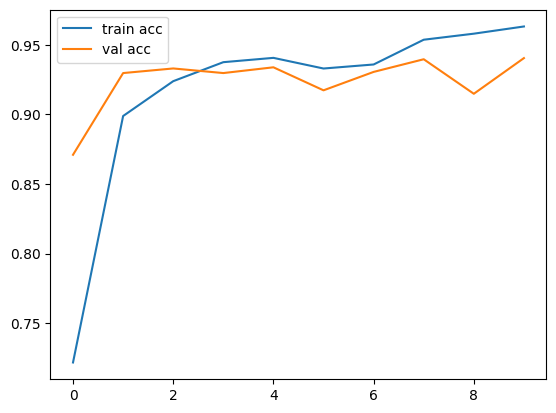

In [22]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

*BUILDING THE PREDICTIVE SYSTEM*

ENTER THE PATH OF THE IMAGE : /content/data/without_mask/without_mask_1001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.03596817 0.97268355]]
WITHOUT MASK


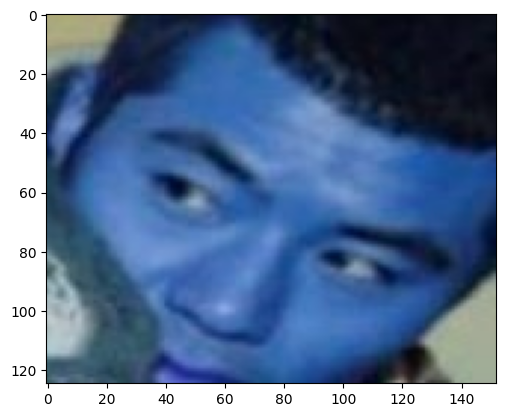

In [23]:
path=input("ENTER THE PATH OF THE IMAGE : ")
img=cv.imread(path)
plt.imshow(img)
img_reized=cv.resize(img,(128,128))
img_reized=cv.cvtColor(img_reized,cv.COLOR_BGR2RGB)
img_array=np.reshape(img_reized,[1,128,128,3])

img_array=img_array/255

pred=model.predict(img_array)
print(pred)
pred=np.argmax(pred)
if pred>0.5:
  print("WITHOUT MASK")
else:
  print("WITH MASK")

In [25]:
# Save the trained model
model.save('mask_detector_model.h5')